In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [24]:
dfCustPort = pd.read_csv("Customer Data/Customer Portfolio Snapshot.csv", header=0)
dfCustPort1=dfCustPort.drop(['RowNumber'],axis=1)
dfCustPort1.head()

,CustomerId,NumOfProducts,HasChckng,IsActiveMember
0,15565701,1.0,0.0,0.0
1,15565706,1.0,1.0,1.0
2,15565714,2.0,0.0,1.0
3,15565779,1.0,1.0,0.0
4,15565796,1.0,1.0,0.0


In [5]:
dfCustInv = pd.read_csv("Customer Data/Customer Investment Snapshot.csv", header=0)
dfCustInv.head()

,RowNumber,CustomerId,Tenure,CreditScore,Balance,EstimatedSalary
0,1,15634602.0,2.0,619.0,NaN,101348.88
1,2,15647311.0,1.0,608.0,83807.86,112542.58
2,3,15619304.0,8.0,502.0,159660.80,113931.57
3,4,15701354.0,1.0,699.0,NaN,93826.63
4,5,15737888.0,2.0,850.0,125510.82,79084.10


In [20]:
dfCustDem = pd.read_csv("Customer Data/Customer Demographics.csv", header=0)
dfCustDem1=dfCustDem.drop(['RowNumber'],axis=1)
dfCustDem1.head()
#dfCustDem.head()

,CustomerId,Surname,Geography,Gender,Age
0,15634602.0,Hargrave,West,Female,42.0
1,15647311.0,Hill,Central,Female,41.0
2,15619304.0,Onio,West,Female,42.0
3,15701354.0,Boni,West,Female,39.0
4,15737888.0,Mitchell,Central,Female,43.0


In [17]:
dfCustAttr = pd.read_csv("Customer Data/Customer Attrition Status.csv", header=0)
dfCustAttr.head()
dfCustAttr1=dfCustAttr.drop(['RowNumber'],axis=1)
dfCustAttr1.head()

,CustomerId,Exited
0,15634602.0,1.0
1,15647311.0,0.0
2,15619304.0,1.0
3,15701354.0,0.0
4,15737888.0,0.0


In [21]:
dfcust1=dfCustDem1.merge(dfCustInv,how='inner',on='CustomerId')
dfcust1.head()

,CustomerId,Surname,Geography,Gender,Age,RowNumber,Tenure,CreditScore,Balance,EstimatedSalary
0,15634602.0,Hargrave,West,Female,42.0,1,2.0,619.0,NaN,101348.88
1,15647311.0,Hill,Central,Female,41.0,2,1.0,608.0,83807.86,112542.58
2,15619304.0,Onio,West,Female,42.0,3,8.0,502.0,159660.80,113931.57
3,15701354.0,Boni,West,Female,39.0,4,1.0,699.0,NaN,93826.63
4,15737888.0,Mitchell,Central,Female,43.0,5,2.0,850.0,125510.82,79084.10


In [22]:
dfcust2=dfcust1.merge(dfCustAttr1,how='inner',on='CustomerId')
dfcust2.head()

,CustomerId,Surname,Geography,Gender,Age,RowNumber,Tenure,CreditScore,Balance,EstimatedSalary,Exited
0,15634602.0,Hargrave,West,Female,42.0,1,2.0,619.0,NaN,101348.88,1.0
1,15647311.0,Hill,Central,Female,41.0,2,1.0,608.0,83807.86,112542.58,0.0
2,15619304.0,Onio,West,Female,42.0,3,8.0,502.0,159660.80,113931.57,1.0
3,15701354.0,Boni,West,Female,39.0,4,1.0,699.0,NaN,93826.63,0.0
4,15737888.0,Mitchell,Central,Female,43.0,5,2.0,850.0,125510.82,79084.10,0.0


In [25]:
dfcust3=dfcust2.merge(dfCustPort1,how='inner',on='CustomerId')
dfcust3.head()

,CustomerId,Surname,Geography,Gender,Age,RowNumber,Tenure,CreditScore,Balance,EstimatedSalary,Exited,NumOfProducts,HasChckng,IsActiveMember
0,15634602.0,Hargrave,West,Female,42.0,1,2.0,619.0,NaN,101348.88,1.0,1.0,1.0,1.0
1,15647311.0,Hill,Central,Female,41.0,2,1.0,608.0,83807.86,112542.58,0.0,1.0,0.0,1.0
2,15619304.0,Onio,West,Female,42.0,3,8.0,502.0,159660.80,113931.57,1.0,3.0,1.0,0.0
3,15701354.0,Boni,West,Female,39.0,4,1.0,699.0,NaN,93826.63,0.0,2.0,0.0,0.0
4,15737888.0,Mitchell,Central,Female,43.0,5,2.0,850.0,125510.82,79084.10,0.0,1.0,1.0,1.0


In [68]:
dfCust4=dfcust3[['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasChckng','IsActiveMember','EstimatedSalary','Exited']]
dfCust4.count()
dfCust4.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,9999.00000,10002.000000,10002.000000,6385.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,5000.031794,1.569097e+07,650.50075,38.943711,5.014797,119841.627383,1.530494,0.705359,0.514997,100105.624356,0.203859
std,2886.796875,7.195055e+04,96.69932,10.612675,2.902953,30100.935329,0.581967,0.455904,0.499800,57515.031841,0.402886
min,1.000000,1.556570e+07,305.00000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562854e+07,584.00000,32.000000,3.000000,100194.440000,1.000000,0.000000,0.000000,51012.472500,0.000000
50%,4999.500000,1.569074e+07,652.00000,37.000000,5.000000,119852.010000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7499.750000,1.575331e+07,717.50000,44.000000,7.000000,139529.930000,2.000000,1.000000,1.000000,149400.922500,0.000000
max,10000.000000,1.581569e+07,865.00000,190.000000,30.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [69]:
dfCust4.duplicated()
#no Duplicate Found

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

In [70]:
dfCust4.isnull().sum()
# null in balance and CreditScore

RowNumber             0
CustomerId            0
Surname               0
CreditScore           3
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasChckng             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [71]:
# Removing null from creditscore with Forward fill method
dfCust4['CreditScore'] = dfCust4['CreditScore'].fillna(method="ffill")
dfCust4.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,West,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,6,15574012.0,Chu,645.0,Central,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0


In [72]:
dfCust4.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasChckng             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [60]:
#unsing Mean of balance to fill missing values

missing_column = ['Balance']
for i in missing_column:
    dfCust4.loc[dfCust4.loc[:,i].isnull(),i]=dfCust4.loc[:,i].mean()

In [61]:
dfCust4.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
dfCust5=dfCust4
# save clensed data 
dfCust4.to_csv('Customer_Churn_Clean.csv', index=False)

In [104]:
dfCustExited=dfCust5[dfCust5['Exited'] == 1.0]
dfCustExited.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
5,6,15574012.0,Chu,645.0,Central,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
7,8,15656148.0,Obinna,376.0,East,Female,29.0,30.0,115046.74,4.0,1.0,0.0,119346.88,1.0
16,17,15737452.0,Romeo,653.0,East,Neutral,58.0,1.0,132602.88,1.0,1.0,0.0,5097.67,1.0
22,23,15699309.0,Gerasimov,510.0,Central,Female,38.0,4.0,NaN,1.0,1.0,0.0,118913.53,1.0
30,31,15589475.0,Azikiwe,591.0,Central,Female,39.0,3.0,NaN,3.0,1.0,0.0,140469.38,1.0
35,36,15794171.0,Lombardo,475.0,West,Female,45.0,0.0,134264.04,1.0,1.0,0.0,27822.99,1.0
41,42,15738148.0,Clarke,465.0,West,Female,51.0,8.0,122522.32,1.0,0.0,0.0,181297.65,1.0
43,44,15755196.0,Lavine,834.0,West,Female,49.0,2.0,131394.56,1.0,0.0,0.0,194365.76,1.0


In [115]:
dfCust5[dfCust5['Exited'] == 1.0].groupby('Age')['Exited'].count()

Age
18.0     2
19.0     1
20.0     2
21.0     3
22.0    12
23.0     6
24.0    14
25.0     6
26.0    14
27.0    13
28.0    23
29.0    28
30.0    24
31.0    33
32.0    32
33.0    44
34.0    33
35.0    57
36.0    53
37.0    62
38.0    63
39.0    72
40.0    91
41.0    69
42.0    77
43.0    88
44.0    73
45.0    87
46.0    91
47.0    77
48.0    80
49.0    75
50.0    71
51.0    66
52.0    64
53.0    40
54.0    51
55.0    48
56.0    50
57.0    38
58.0    29
59.0    30
60.0    32
61.0    21
62.0    21
63.0    18
64.0    12
65.0     8
66.0     7
67.0     5
68.0     6
69.0     2
70.0     4
71.0     7
72.0     1
73.0     1
74.0     1
84.0     1
Name: Exited, dtype: int64

In [52]:
## Plots 

In [36]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Geography', ylabel='count'>

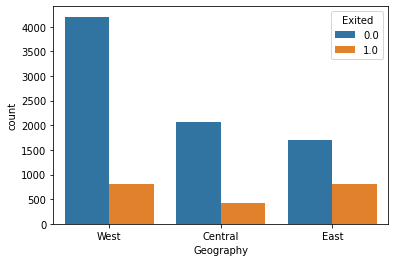

In [86]:
# Geography Wise Existestence
sn.countplot(x="Geography",data=dfCust5, hue="Exited")
#sns.barplot(x=" column on x", y=" column on y",hue="legends

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

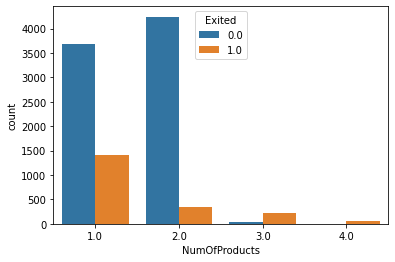

In [109]:
#No of product wise existence
sn.countplot(x="NumOfProducts",data=dfCust5, hue="Exited")

<AxesSubplot:xlabel='Gender', ylabel='count'>

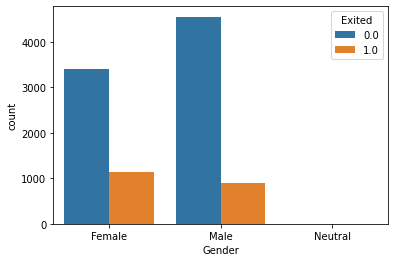

In [89]:
#Gender wise existence
sn.countplot(x="Gender",data=dfCust5, hue="Exited")

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

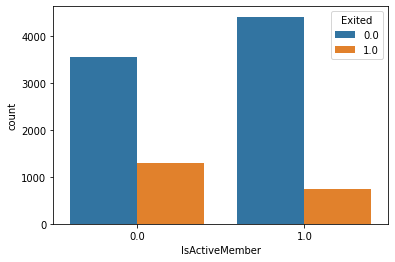

In [110]:
# Active member 
sn.countplot(x="IsActiveMember",data=dfCust5, hue="Exited")

<AxesSubplot:xlabel='Age', ylabel='count'>

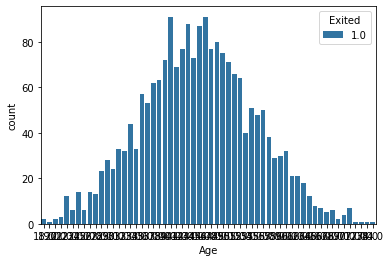

In [87]:
# Age Wise Churn
sn.countplot(x="Age",data=dfCustExited, hue="Exited")

<AxesSubplot:xlabel='Geography', ylabel='Age'>

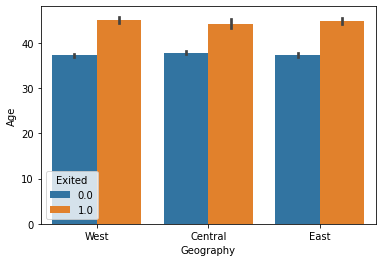

In [102]:
# Age and Geography wise Existence
sn.barplot(x="Geography", y="Age",data=dfCust4, hue="Exited")

<AxesSubplot:xlabel='Tenure', ylabel='NumOfProducts'>

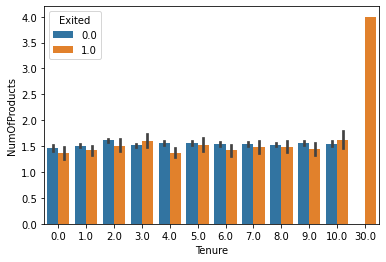

In [108]:
# Tenure and No of Product wise Existence
sn.barplot(x="Tenure", y="NumOfProducts",data=dfCust4, hue="Exited")

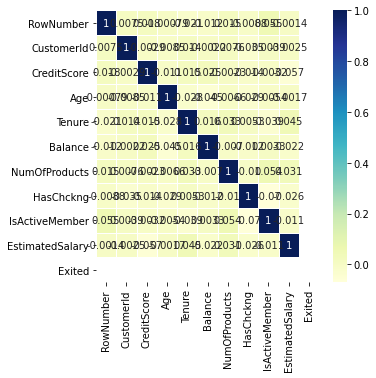

In [88]:
# corelation graph as mentioned in Project description 
plt.figure(figsize = (5, 5))
corr = dfCustExited.corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

<AxesSubplot:xlabel='Balance'>

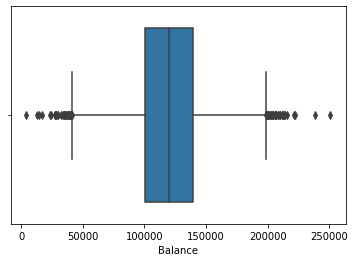

In [119]:
sn.boxplot(data=dfCust4, x="Balance")

<AxesSubplot:ylabel='Frequency'>

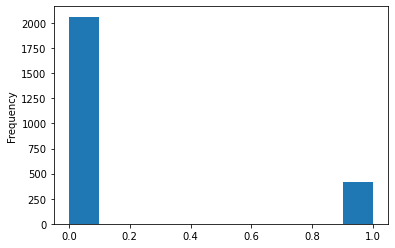

In [44]:
#ignore
Central=dfCust4.loc[dfCust4.Geography== "Central"]
Central.Exited.plot.hist()